## ***1. Import Library's & Upload DataSet with OpenCV***

In [17]:
paths=["/kaggle/input/covid19-image-dataset/Covid19-dataset/train/",
       "/kaggle/input/covid19-image-dataset/Covid19-dataset/test/"]

In [18]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def imshow(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img,cmap='gray')

In [20]:
possible_labels=os.listdir(paths[0])

In [21]:
possible_labels

['Normal', 'Viral Pneumonia', 'Covid']

## ***2. Data Preprocessing for Image Classification***

In [22]:
data=[]

for i,path in enumerate(paths):
  for label_int,label_string in enumerate(possible_labels):
    filenames=glob.glob(path+label_string+"/*.jpg")+glob.glob(path+label_string+"/*.jpeg")+glob.glob(path+label_string+"/*.png")
    for filename in filenames:
          img=cv2.imread(filename)
          data.append( [label_int,cv2.resize(img,(224,224))] )
len(data)

317

## ***3. Data Splitting for Training, Testing, and Validation***

In [23]:
import random
random.Random(0).shuffle(data) 

In [24]:
x_train=[]
y_train=[]

x_val=[]
y_val=[]

x_test=[]
y_test=[]


for i, sample in enumerate(data):

    label=sample[0]
    img=sample[1]
    if i <= 0.8*len(data):
      x_train.append(img)
      y_train.append(label)
      

    elif i>0.8*len(data) and i<=0.9*len(data):
      x_val.append(img)
      y_val.append(label)
   

    else:
      x_test.append(img)
      y_test.append(label)
     

x_train=np.array(x_train)
x_val=np.array(x_val)
x_test=np.array(x_test)

y_train=np.array(y_train)
y_val=np.array(y_val)
y_test=np.array(y_test)

In [25]:
x_train[0].shape

(224, 224, 3)

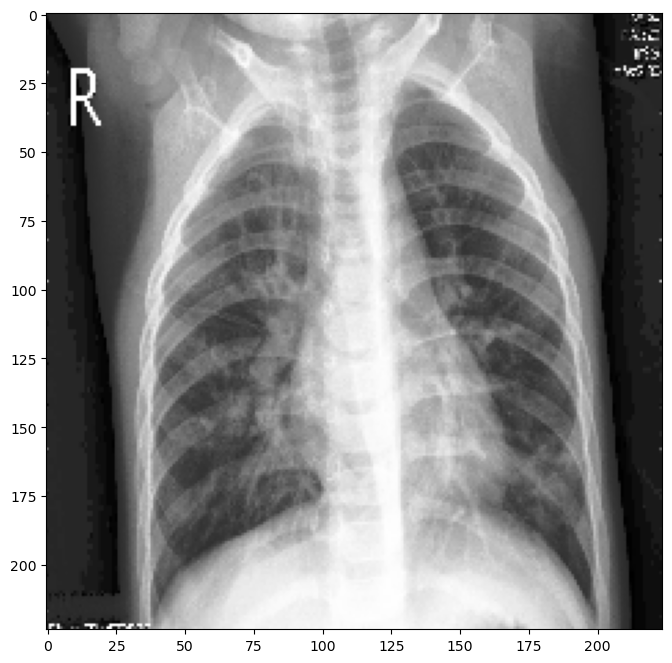

In [26]:
imshow(x_train[0])

In [27]:
y_train[0]

1

## ***4. Convolutional Neural Network (CNN) Architecture for Image Classification***


In [28]:
import tensorflow as tf
y_trainOneHot=tf.one_hot(y_train,len(possible_labels))
y_valOneHot=tf.one_hot(y_val,len(possible_labels))
y_testOneHot=tf.one_hot(y_test,len(possible_labels))

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [31]:
def cnn_model():
  model = Sequential()
  model.add(Convolution2D(32, (3, 3), input_shape = (224, 224,3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(30, activation = 'relu'))
  model.add(Dense(3, activation = 'softmax'))
  model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model

In [32]:
model=cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 30)                11828190  
                                                                 
 dense_1 (Dense)             (None, 3)                 93        
                                                                 
Total params: 11,829,179
Trainable params: 11,829,179
Non-trainable params: 0
____________________________________________

In [33]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
checkpoint = ModelCheckpoint('checkpoint/model.{epoch:d}.h5',save_best_only=False,save_freq='epoch')
tensorboard_callback = tf.keras.callbacks.TensorBoard('logs/cnn_logs', histogram_freq=1)

In [34]:
x_train.shape

(254, 224, 224, 3)

In [35]:
x_val.shape

(32, 224, 224, 3)

In [36]:
model.fit(x_train,
          y_trainOneHot,
          epochs=40, 
          batch_size=100,
          validation_data=(x_val,y_valOneHot),
         # callbacks=[tensorboard_callback,checkpoint]
          )

Epoch 1/40
3/3 [==============================] - 9s 304ms/step - loss: 703177.2500 - accuracy: 0.4213 - val_loss: 253.2369 - val_accuracy: 0.4062
Epoch 2/40
3/3 [==============================] - 0s 44ms/step - loss: 599028096.0000 - accuracy: 0.3228 - val_loss: 3536798.5000 - val_accuracy: 0.3125
Epoch 3/40
3/3 [==============================] - 0s 46ms/step - loss: 87087760015360.0000 - accuracy: 0.4370 - val_loss: 4374707.0000 - val_accuracy: 0.5625
Epoch 4/40
3/3 [==============================] - 0s 46ms/step - loss: 1002676.8125 - accuracy: 0.4567 - val_loss: 1.0999 - val_accuracy: 0.2500
Epoch 5/40
3/3 [==============================] - 0s 45ms/step - loss: 1.0979 - accuracy: 0.2913 - val_loss: 1.0998 - val_accuracy: 0.2500
Epoch 6/40
3/3 [==============================] - 0s 44ms/step - loss: 1.0975 - accuracy: 0.2913 - val_loss: 1.0997 - val_accuracy: 0.3750
Epoch 7/40
3/3 [==============================] - 0s 44ms/step - loss: 1.0970 - accuracy: 0.4291 - val_loss: 1.0995 - v

## **5. Prediction & Testing model with test dataset**

In [37]:
x_test[0:1].shape

(1, 224, 224, 3)

In [38]:
possible_labels[ np.argmax(model.predict(x_test[0:1])) ]

1/1 [==============================] - 0s 113ms/step


'Covid'

In [39]:
model.evaluate(x=x_test,y=y_testOneHot)

1/1 [==============================] - 0s 92ms/step - loss: 1.0761 - accuracy: 0.5161


[1.0760645866394043, 0.5161290168762207]

## **6. Improving the model using Transfer Learning**

In [40]:
!pip install tensorflow_hub

In [41]:
import tensorflow_hub as hub

In [42]:
path_model="https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

In [43]:
def tfLearning_model():
  model = Sequential()
  model.add(hub.KerasLayer(path_model,trainable=False))
  model.add(Dense(30, activation = 'relu'))
  model.add(Dense(3, activation = 'softmax'))
  model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  model.build([None,224,224,3])
  return model

In [44]:
model_tfLearning=tfLearning_model()

In [45]:
model_tfLearning.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 30)                38430     
                                                                 
 dense_3 (Dense)             (None, 3)                 93        
                                                                 
Total params: 2,296,507
Trainable params: 38,523
Non-trainable params: 2,257,984
_________________________________________________________________


In [46]:
model_tfLearning.fit(x_train,
          y_trainOneHot,
          epochs=40, 
          batch_size=100,
          validation_data=(x_val,y_valOneHot),
         # callbacks=[tensorboard_callback,checkpoint]
          )

Epoch 1/40
3/3 [==============================] - 6s 735ms/step - loss: 1.1984 - accuracy: 0.3583 - val_loss: 1.1693 - val_accuracy: 0.4375
Epoch 2/40
3/3 [==============================] - 0s 76ms/step - loss: 0.9650 - accuracy: 0.5709 - val_loss: 0.9951 - val_accuracy: 0.5312
Epoch 3/40
3/3 [==============================] - 0s 77ms/step - loss: 0.9993 - accuracy: 0.5118 - val_loss: 0.9590 - val_accuracy: 0.5000
Epoch 4/40
3/3 [==============================] - 0s 75ms/step - loss: 0.8575 - accuracy: 0.6890 - val_loss: 0.9157 - val_accuracy: 0.5312
Epoch 5/40
3/3 [==============================] - 0s 75ms/step - loss: 0.8753 - accuracy: 0.5709 - val_loss: 1.0476 - val_accuracy: 0.5000
Epoch 6/40
3/3 [==============================] - 0s 74ms/step - loss: 0.9882 - accuracy: 0.5984 - val_loss: 0.8662 - val_accuracy: 0.5938
Epoch 7/40
3/3 [==============================] - 0s 75ms/step - loss: 0.7580 - accuracy: 0.6890 - val_loss: 0.8011 - val_accuracy: 0.7188
Epoch 8/40
3/3 [==========

In [47]:
model_tfLearning.evaluate(x=x_test,y=y_testOneHot)

1/1 [==============================] - 0s 408ms/step - loss: 0.4674 - accuracy: 0.8065


[0.4674357771873474, 0.8064516186714172]